In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train =  X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [16]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
469/469 [==============================] - 59s 123ms/step - loss: 0.5613 - accuracy: 0.8016
Epoch 2/10
469/469 [==============================] - 57s 122ms/step - loss: 0.3680 - accuracy: 0.8693
Epoch 3/10
469/469 [==============================] - 55s 118ms/step - loss: 0.3270 - accuracy: 0.8829
Epoch 4/10
469/469 [==============================] - 59s 125ms/step - loss: 0.3004 - accuracy: 0.8918
Epoch 5/10
469/469 [==============================] - 56s 119ms/step - loss: 0.2829 - accuracy: 0.8979
Epoch 6/10
469/469 [==============================] - 55s 118ms/step - loss: 0.2713 - accuracy: 0.9014
Epoch 7/10
469/469 [==============================] - 54s 116ms/step - loss: 0.2594 - accuracy: 0.9055
Epoch 8/10
469/469 [==============================] - 56s 120ms/step - loss: 0.2460 - accuracy: 0.9089
Epoch 9/10
469/469 [==============================] - 55s 117ms/step - loss: 0.2410 - accuracy: 0.9104
Epoch 10/10
469/469 [==============================] - 55s 118ms/step - l

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Nочность на тестовых данных: ', test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.2395 - accuracy: 0.9143
Nочность на тестовых данных:  0.9143000245094299


In [18]:
pred = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


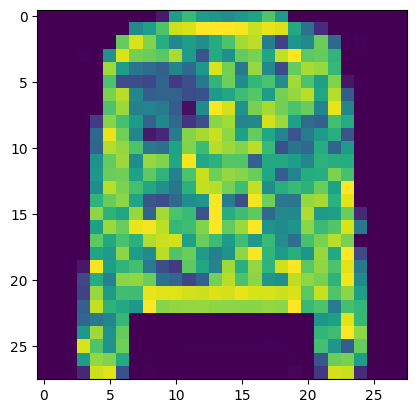

In [44]:
import matplotlib.pyplot as plt
num = 893
plt.imshow(X_test[num])

In [45]:
import numpy as np
class_names_ru = [
    "Футболка/топ",
    "Брюки",
    "Пуловер",
    "Платье",
    "Пальто",
    "Сандали",
    "Рубашка",
    "Кроссовки",
    "Сумка",
    "Ботинки"
]
class_index = np.argmax(pred[num])
print(class_names_ru[class_index])
class_y_test = np.argmax(y_test[num])
print(class_names_ru[class_y_test])
model.save("model.keras")

Пальто
Пуловер
